In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);

In [ ]:
data=pd.read_csv('players_20.csv');
data.head();

In [ ]:
print(data.shape);
print(data.columns);

(18278, 104)
Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


In [ ]:
#Dropping irrelevant features:
data.drop(['player_url','sofifa_id','long_name','team_jersey_number','loaned_from','nation_jersey_number', \
           'player_tags','nation_position','team_jersey_number','player_positions',\
          'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes'], axis = 1, inplace = True);

/home/akshay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


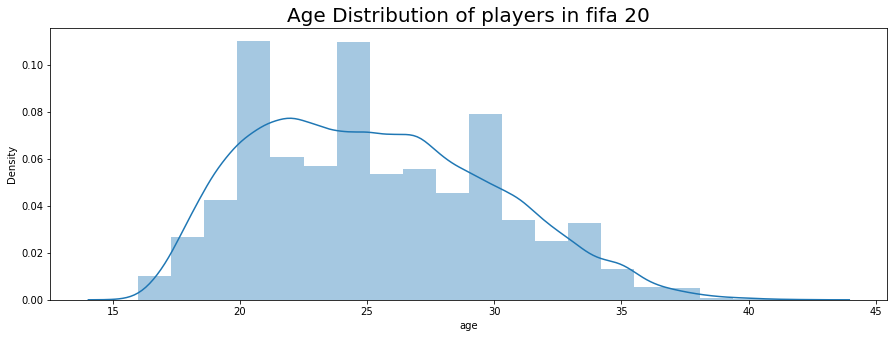

In [ ]:
plt.figure(figsize=(15,5));
plt.title('Age Distribution of players in fifa 20', fontsize=20);
sns.distplot(a=data['age'], kde=True, bins=20);

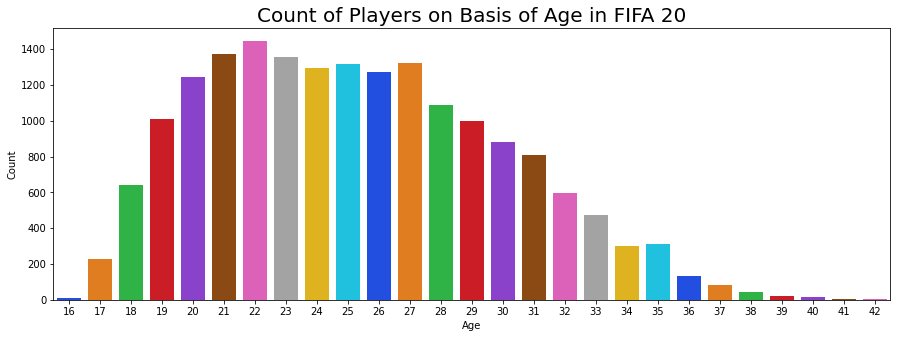

In [ ]:
plt.figure(figsize= (15,5));

ax = sns.countplot(x='age', data=data, palette='bright');
ax.set_title(label='Count of Players on Basis of Age in FIFA 20', fontsize=20);

ax.set_xlabel(xlabel='Age', fontsize=10);
ax.set_ylabel(ylabel='Count', fontsize=10);

plt.show();

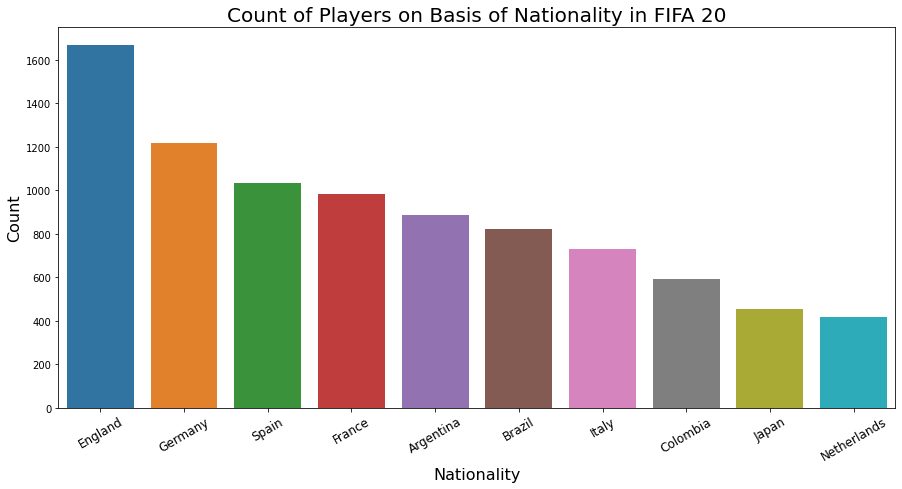

In [ ]:
plt.figure(figsize= (15, 7));

ax = sns.countplot(x='nationality', data=data, palette=None, order=data.nationality.value_counts().iloc[:10].index);
ax.set_title(label='Count of Players on Basis of Nationality in FIFA 20', fontsize=20);

ax.set_xlabel(xlabel='Nationality', fontsize=16);
ax.set_ylabel(ylabel='Count', fontsize=16);
plt.xticks(rotation=30, fontsize=12);

plt.show();

/home/akshay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


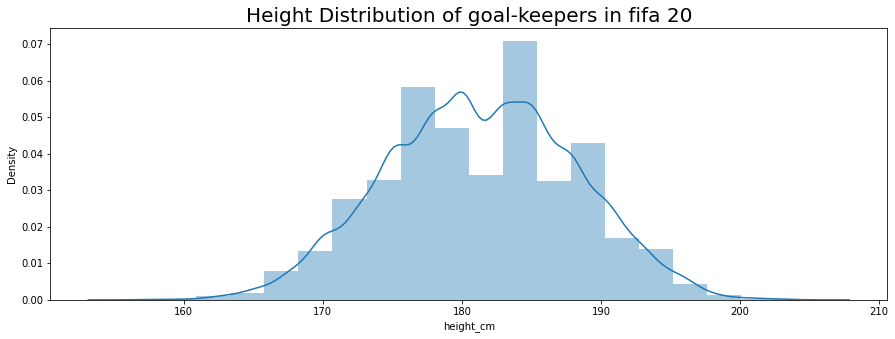

In [ ]:
plt.figure(figsize=(15,5));
plt.title('Height Distribution of goal-keepers in fifa 20', fontsize=20);
sns.distplot(a=data['height_cm'], kde=True, bins=20);

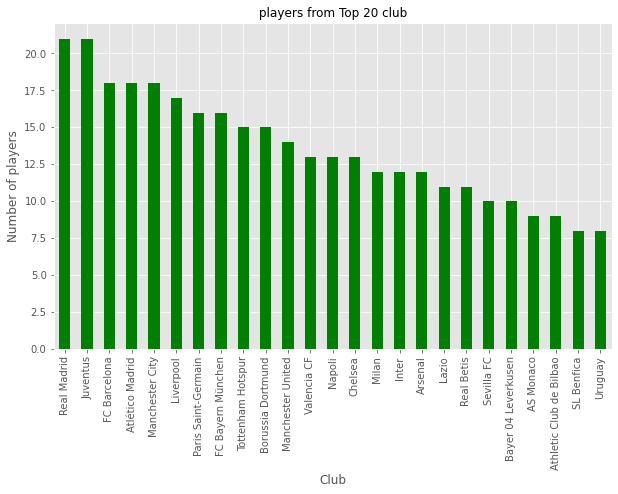

In [ ]:
df = data.filter(['club','overall']);
df = df[df.overall>=80];
df =df['club'].value_counts();
df=df.head(25);
plt.rcParams['figure.figsize']= 10,6;
with plt.style.context(('ggplot')):df.plot(kind='bar',color = 'green');
plt.title(' players from Top 20 club ');
plt.xlabel('Club');
plt.ylabel('Number of players');

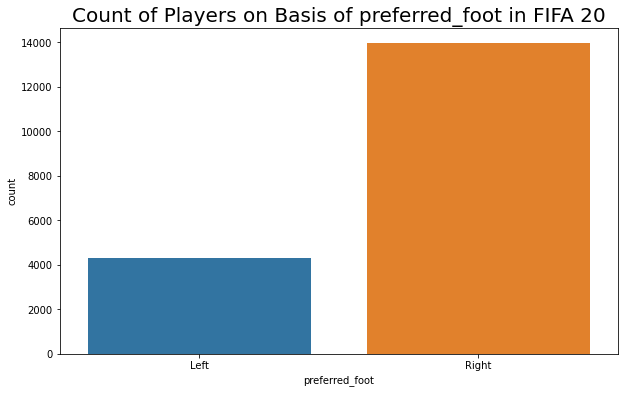

In [ ]:
ax = sns.countplot(x='preferred_foot', data=data, palette=None);
ax.set_title(label='Count of Players on Basis of preferred_foot in FIFA 20', fontsize=20);

In [ ]:
#Filling empty data accordingly:
data['team_position'].isnull().sum()

240

In [ ]:
data['team_position'].fillna(data['team_position'].mode()[0],inplace=True)

In [ ]:
data['team_position'].isnull().sum()

0

In [ ]:
data_gk=data.loc[data['team_position'] == "GK"];
data_gk.head(5)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,2014-07-01,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Alisson,26,1992-10-02,191,91,Brazil,Liverpool,89,91,58000000,155000,Right,3,3,1,Medium/Medium,Normal,Yes,111700000.0,GK,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,De Gea,28,1990-11-07,192,82,Spain,Manchester United,89,90,56000000,205000,Right,4,3,1,Medium/Medium,Lean,Yes,110600000.0,GK,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Ederson,25,1993-08-17,188,86,Brazil,Manchester City,88,91,54500000,185000,Left,2,3,1,Medium/Medium,Normal,Yes,104900000.0,GK,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_oth=data.loc[data['team_position']!="GK"];
data_oth.head(5)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Early Crosser, Finesse Shot, Speed Dribbler (CPU AI Only), 1-on-1 Rush, Giant Throw-in, Outside Foot Shot",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials, Early Crosser, Speed Dribbler (CPU AI Only), Skilled Dribbling",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early Crosser, Speed Dribbler (CPU AI Only), Crowd Favourite",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Speed Dribbler (CPU AI Only), Crowd Favourite",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,High/High,Normal,Yes,166500000.0,RCM,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Dives Into Tackles (CPU AI Only), Leadership, Argues with Officials, Finesse Shot",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
data_gk_null=data_gk.isnull().sum();
display(data_gk_null)

short_name                      0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur             41
team_position                   0
joined                         41
contract_valid_until            0
pace                          662
shooting                      662
passing                       662
dribbling                     662
defending                     662
physic                        662
gk_diving                       0
gk_handling   

In [ ]:
data_gk=data_gk.drop(['dob','pace','shooting','passing','dribbling','defending','physic','player_traits',\
                      'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm',\
                      'cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis=1);
data_gk.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,2014-07-16,2023.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,2014-07-01,2022.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,Right,3,3,1,Medium/Medium,Normal,Yes,111700000.0,GK,2018-07-19,2024.0,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,Right,4,3,1,Medium/Medium,Lean,Yes,110600000.0,GK,2011-07-01,2020.0,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,Left,2,3,1,Medium/Medium,Normal,Yes,104900000.0,GK,2017-07-01,2024.0,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8


/home/akshay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


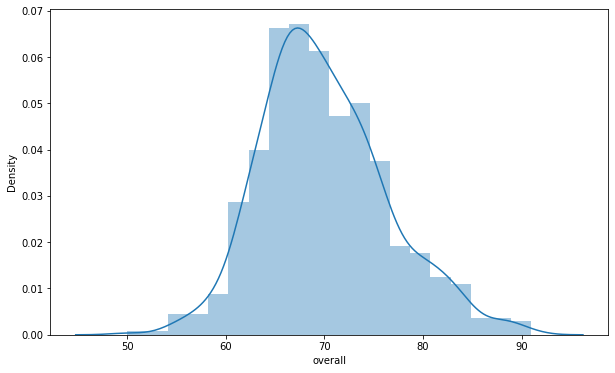

In [ ]:
#Overall Score Distribution
sns.distplot(a=data_gk['overall'], kde=True, bins=20);

/home/akshay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


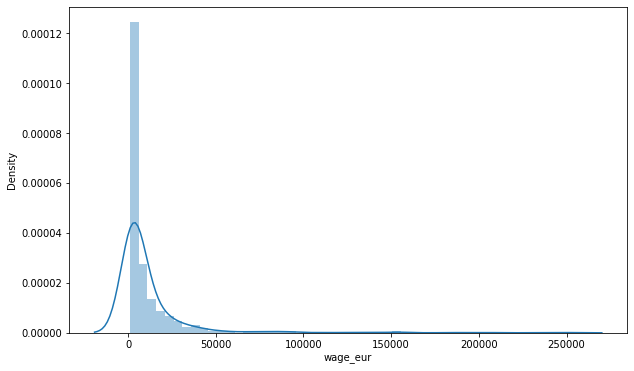

In [ ]:
#Wage in euros distribution:
sns.distplot(a=data_gk['wage_eur'], kde=True);

/home/akshay/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/akshay/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/akshay/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/a

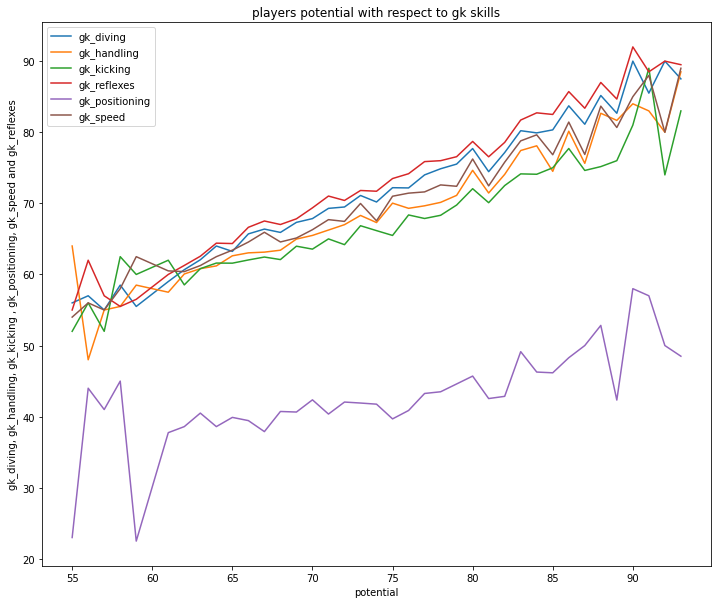

In [ ]:
plt.rcParams['figure.figsize']= 12,10
sns.lineplot('potential' ,'gk_diving', data=data_gk,legend='brief',ci=None).set_title('players potential with respect to gk skills');
sns.lineplot('potential','gk_handling',data=data_gk,legend='brief',ci=None);
sns.lineplot('potential','gk_kicking',data=data_gk,legend='brief',ci=None);
sns.lineplot('potential','gk_reflexes',data=data_gk,legend='brief',ci=None);
sns.lineplot('potential','gk_speed',data=data_gk,legend='brief',ci=None);
sns.lineplot('potential','gk_positioning',data=data_gk,legend='brief',ci=None).set_ylabel('gk_diving, gk_handling, gk_kicking , gk_positioning, gk_speed and gk_reflexes');
plt.legend(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning','gk_speed']);
plt.show();

In [ ]:
data_oth.isnull().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1257
team_position                     0
joined                         1247
contract_valid_until            240
pace                           1374
shooting                       1374
passing                        1374
dribbling                      1374
defending                      1374
physic                      

In [ ]:
data_oth=data_oth.drop(['dob','work_rate','real_face','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed',\
                     'gk_positioning','player_traits'],axis=1)
data_oth.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,RCM,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
data1=data_oth
data1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,RCM,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
data1['joined'].fillna(0,inplace=True)
data1['contract_valid_until'].fillna(0,inplace=True)

In [ ]:
data1['joined']= pd.to_datetime(data1['joined'], format='%Y-%m-%d',errors='coerce')

In [ ]:
data1['contract_valid_until'] =data1['contract_valid_until'].astype(int)
data1['contract_valid_until'].head()

0    2021
1    2022
2    2022
4    2024
5    2023
Name: contract_valid_until, dtype: int64

/home/akshay/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


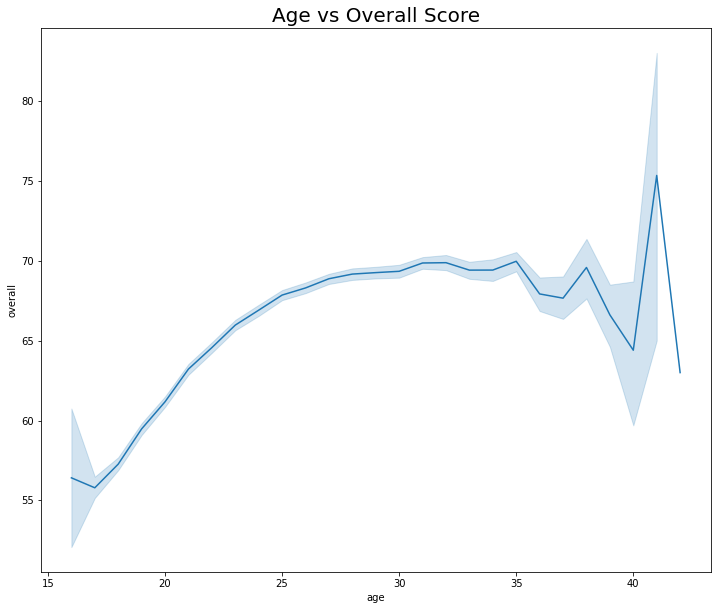

In [ ]:
avp = sns.lineplot(data1['age'], data1['overall'], palette = 'Wistia')
plt.title('Age vs Overall Score', fontsize = 20)

plt.show()

/home/akshay/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


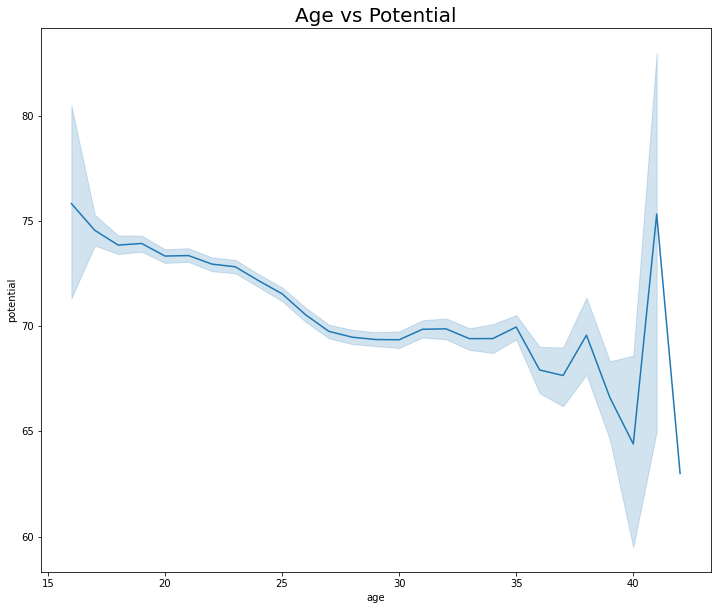

In [ ]:
avp = sns.lineplot(data1['age'], data1['potential'], palette = 'Wistia')
plt.title('Age vs Potential', fontsize = 20)
plt.show()

In [ ]:
corr, _ = pearsonr(data['value_eur'],data['age'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.082


<AxesSubplot:>

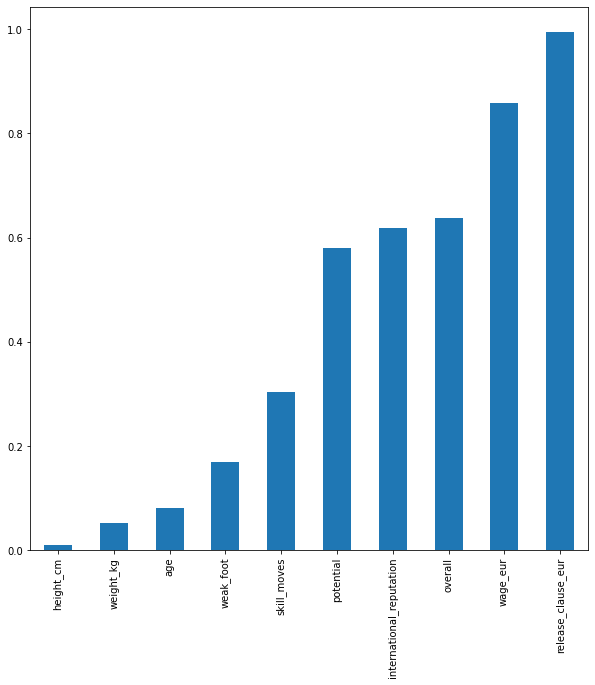

In [ ]:
columns = ['age','height_cm','weight_kg','nationality','club','overall','potential','value_eur','wage_eur','skill_moves','international_reputation','weak_foot','release_clause_eur','team_position']
DF = data[columns]
DF = DF.corrwith(DF['value_eur'])
DF = DF.drop(['value_eur'])
DF = DF.sort_values()
plt.figure(figsize=(10,10))
DF.plot.bar()

In [ ]:
columns = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','skill_moves','international_reputation','weak_foot','release_clause_eur']
DF_dat = pd.DataFrame(data[columns])
display(DF_dat.shape)

#Finding the mean of the column having NaN
mean_value_rlscls=DF_dat['release_clause_eur'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
DF_dat['release_clause_eur'].fillna(value=mean_value_rlscls, inplace=True)

for x in DF_dat.columns:
    if(x!='value_eur'):
        corr, _ = pearsonr(DF_dat['value_eur'],DF_dat[x])
        print(x,'Pearsons correlation: %.3f' % corr)

DF_dat.head()


(18278, 11)

age Pearsons correlation: 0.082
height_cm Pearsons correlation: 0.010
weight_kg Pearsons correlation: 0.052
overall Pearsons correlation: 0.638
potential Pearsons correlation: 0.581
wage_eur Pearsons correlation: 0.858
skill_moves Pearsons correlation: 0.304
international_reputation Pearsons correlation: 0.618
weak_foot Pearsons correlation: 0.169
release_clause_eur Pearsons correlation: 0.980


,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,skill_moves,international_reputation,weak_foot,release_clause_eur
0,32,170,72,94,94,95500000,565000,4,5,4,195800000.0
1,34,187,83,93,93,58500000,405000,5,5,4,96500000.0
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0
3,26,188,87,91,93,77500000,125000,1,3,3,164700000.0
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0


In [ ]:
#Dropping irrelevant features:
DF2 = DF_dat.drop(['height_cm','weight_kg'], axis = 1);

In [ ]:
DF2.head()

,age,overall,potential,value_eur,wage_eur,skill_moves,international_reputation,weak_foot,release_clause_eur
0,32,94,94,95500000,565000,4,5,4,195800000.0
1,34,93,93,58500000,405000,5,5,4,96500000.0
2,27,92,92,105500000,290000,5,5,5,195200000.0
3,26,91,93,77500000,125000,1,3,3,164700000.0
4,28,91,91,90000000,470000,4,4,4,184500000.0


In [ ]:
y = DF2['value_eur']
DF1 = DF2.drop(['value_eur'], axis = 1);
X = DF1

X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [ ]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lazypredict.Supervised import LazyRegressor

/home/akshay/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/akshay/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/akshay/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 41/41 [01:13<00:00,  1.79s/it]


In [ ]:
print(models)

                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
XGBRegressor                                 0.99       0.99   425922.25   
BaggingRegressor                             0.99       0.99   465521.24   
RandomForestRegressor                        0.99       0.99   473567.30   
ExtraTreesRegressor                          0.99       0.99   529905.02   
GradientBoostingRegressor                    0.99       0.99   551013.29   
LGBMRegressor                                0.99       0.99   581366.16   
DecisionTreeRegressor                        0.98       0.98   674660.04   
HistGradientBoostingRegressor                0.98       0.98   777347.10   
KNeighborsRegressor                          0.97       0.97   932586.58   
ExtraTreeRegressor                           0.96       0.96  1014029.83   
LassoLars                                    0.96       0.96  1031600.01   
Lasso       

In [ ]:
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()
linear_regressor.fit(np.array(X_train), y_train.reshape(-1, 1))

y_predict = linear_regressor.predict(X_test)



In [ ]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predict), 2))

Mean absolute error = 463667.02
Mean squared error = 1064210068966.49
Median absolute error = 216345.05
Explain variance score = 0.96
R2 score = 0.96


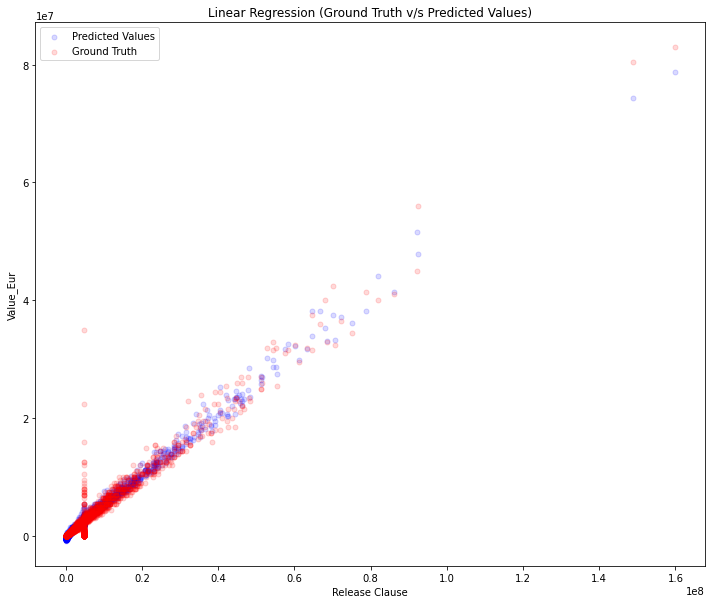

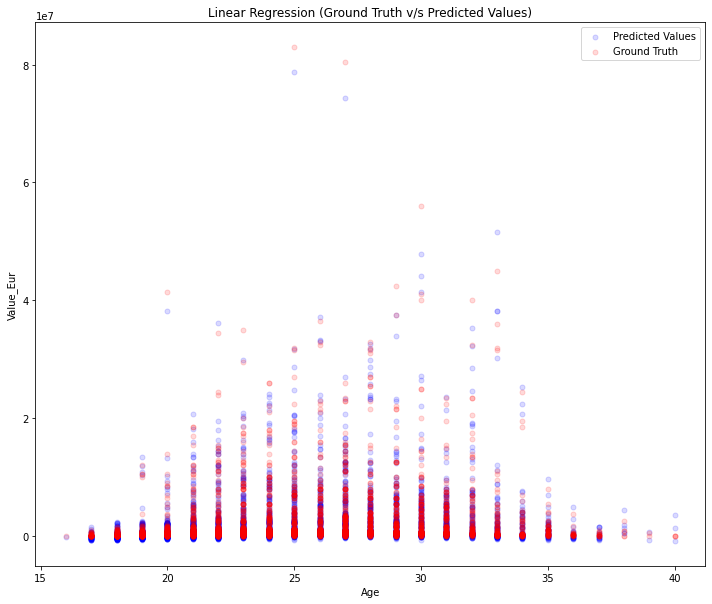

In [ ]:
plt.scatter(X_test[:,-1],y_predict,c='b',s=25,alpha=0.15, label= "Predicted Values")
plt.title('Linear Regression (Ground Truth v/s Predicted Values)')
plt.xlabel('Release Clause')
plt.ylabel('Value_Eur')
plt.scatter(X_test[:,-1],y_test,c='r',s=25,alpha=0.15, label= "Ground Truth")
plt.legend(loc="best")
plt.show()


plt.scatter(X_test[:,0],y_predict,c='b',s=25,alpha=0.15,label= "Predicted Values")
plt.title('Linear Regression (Ground Truth v/s Predicted Values)')
plt.xlabel('Age')
plt.ylabel('Value_Eur')
plt.scatter(X_test[:,0],y_test,c='r',s=25,alpha=0.15,label= "Ground Truth")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X_train, y_train)

y_predict_svr = svr_regressor.predict(X_test)



In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict_svr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict_svr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict_svr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict_svr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predict_svr), 2))

Mean absolute error = 2053336.54
Mean squared error = 27864992933225.82
Median absolute error = 504995.95
Explain variance score = 0.0
R2 score = -0.11


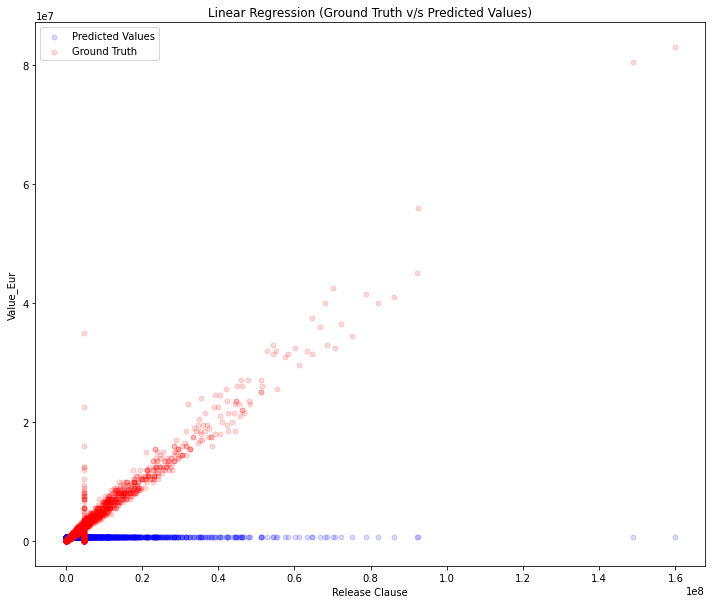

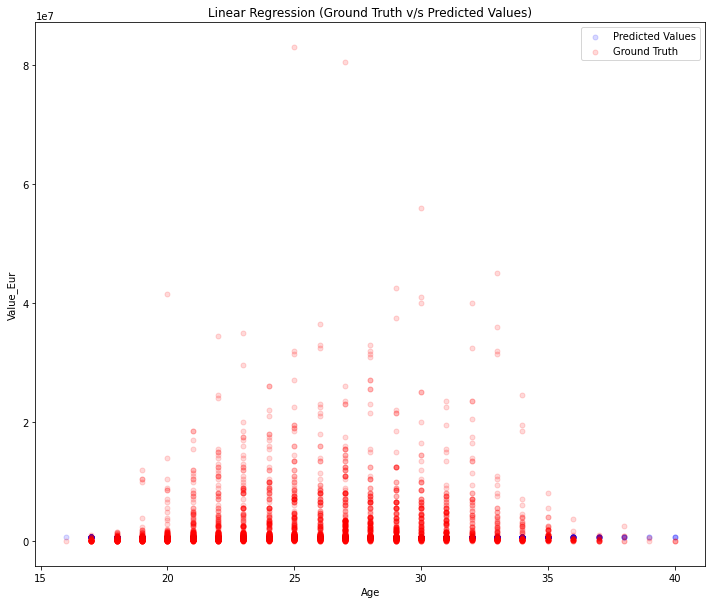

In [ ]:
plt.scatter(X_test[:,-1],y_predict_svr,c='b',s=25,alpha=0.15, label="Predicted Values")
plt.title('Linear Regression (Ground Truth v/s Predicted Values)')
plt.xlabel('Release Clause')
plt.ylabel('Value_Eur')
plt.scatter(X_test[:,-1],y_test,c='r',s=25,alpha=0.15,label="Ground Truth")
plt.legend(loc="best")
plt.show()


plt.scatter(X_test[:,0],y_predict_svr,c='b',s=25,alpha=0.15, label="Predicted Values")
plt.title('Linear Regression (Ground Truth v/s Predicted Values)')
plt.xlabel('Age')
plt.ylabel('Value_Eur')
plt.scatter(X_test[:,0],y_test,c='r',s=25,alpha=0.15,label="Ground Truth")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
forest_regressor.fit(X_train, y_train)

y_predict_rf = forest_regressor.predict(X_test)


In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict_rf), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict_rf), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict_rf), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict_rf), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predict_rf), 2))

Mean absolute error = 130184.19
Mean squared error = 234553833103.91
Median absolute error = 20000.0
Explain variance score = 0.99
R2 score = 0.99


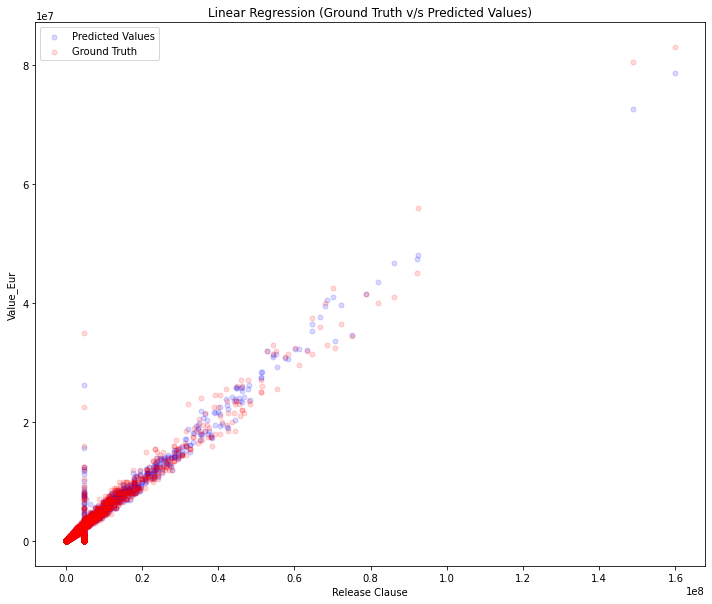

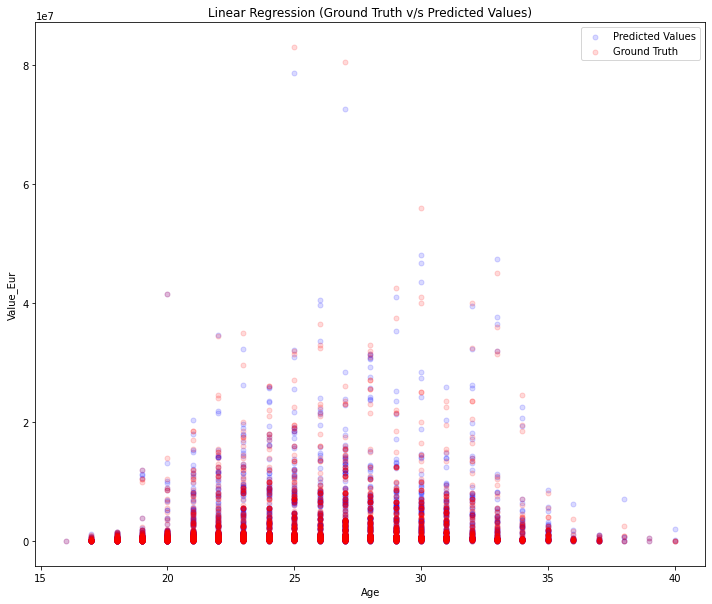

In [ ]:
plt.scatter(X_test[:,-1],y_predict_rf,c='b',s=25,alpha=0.15, label="Predicted Values")
plt.title('Linear Regression (Ground Truth v/s Predicted Values)')
plt.xlabel('Release Clause')
plt.ylabel('Value_Eur')
plt.scatter(X_test[:,-1],y_test,c='r',s=25,alpha=0.15, label="Ground Truth")
plt.legend(loc="best")
plt.show()


plt.scatter(X_test[:,0],y_predict_rf,c='b',s=25,alpha=0.15,label="Predicted Values")
plt.title('Linear Regression (Ground Truth v/s Predicted Values)')
plt.xlabel('Age')
plt.ylabel('Value_Eur')
plt.scatter(X_test[:,0],y_test,c='r',s=25,alpha=0.15, label="Ground Truth")
plt.legend(loc="best")
plt.show()